In [2]:
from yfiles_jupyter_graphs import GraphWidget
import numpy as np
import mpg.visualisation.graph as vg

In [2]:

w = GraphWidget()

w.nodes = [
    {"id": 0, "properties": {"firstName": "Alpha", "label": "Person A"}},
    {"id": "one", "properties": {"firstName": "Bravo", "label": "Person B"}},
    {"id": 2.0, "properties": {"firstName": "Charlie", "label": "Person C", "has_hat": False}},
    {"id": True, "properties": {"firstName": "Delta", "label": "Person D", "likes_pizza": True}}
]
w.edges = [
    {"id": "zero", "start": 0, "end": "one", "properties": {"since": "1992", "label": "knows"}},
    {"id": 1, "start": "one", "end": True, "properties": {"label": "knows", "since": "1992"}},
    {"id": 2.0, "start": 2.0, "end": True, "properties": {"label": "knows", "since": "1992"}},
    {"id": False, "start": 0, "end": 2.0, "properties": {"label": "knows", "since": 234}}
]
w.directed = True

w.show()  # or just w



GraphWidget(layout=Layout(height='500px', width='100%'))

In [3]:
import networkx as nx
GV=vg.GraphVisualisation(nx.DiGraph())

GV.add_edge(0,1,weight=2,since="since")
GV.add_edge(1,2,weight=5)
GV.add_edge(2,0,weight=1)
GV.show()

GraphVisualisation(layout=Layout(height='500px', width='100%'))

In [4]:
GV.edges[-1]["properties"]= {"firstName": "Alpha", "label": "Person A"}

In [5]:
GV

GraphVisualisation(layout=Layout(height='500px', width='100%'))

In [3]:
import mpg.visualisation.graph as vg
from mpg.visualisation.game import MPGVisualisation
import mpg.visualisation.game as vgame
from mpg.games import mpg

In [4]:
G=mpg.mpg_from_file("data/test01.in",ignore_header=1)
M=MPGVisualisation(G)
M

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [5]:
M.set_node_color_mapping(vgame.WinnerVisualiser)
M.set_edge_color_mapping(vgame.StrategyVisualiser)
M

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [6]:
X=M.graph.as_min_max_system().solve()
X

{V_1(0): 70,
 V_0(4): -inf,
 V_1(7): 70,
 V_1(2): 63,
 V_0(0): -inf,
 V_1(3): -inf,
 V_1(6): 67,
 V_1(1): -inf,
 V_0(7): -inf,
 V_0(2): -inf,
 V_1(5): -inf,
 V_0(3): 70,
 V_0(5): 70,
 V_0(6): -inf,
 V_0(1): 70,
 V_1(4): 67}

In [7]:
M.graph.as_min_max_system()

System of 16 min-max constraints:
	V_0(1) <= max(V_1(2)+5,V_1(4)+4)
	V_1(2) <= min(V_0(3)+-7)
	V_1(1) <= min(V_0(2)+5,V_0(4)+4)
	V_0(2) <= max(V_1(3)+-7)
	V_1(4) <= min(V_0(5)+-3)
	V_0(4) <= max(V_1(5)+-3)
	V_1(3) <= min(V_0(7)+0,V_0(6)+5)
	V_0(3) <= max(V_1(7)+0,V_1(6)+5)
	V_1(7) <= min(V_0(1)+0)
	V_0(7) <= max(V_1(1)+0)
	V_1(6) <= min(V_0(1)+-3)
	V_0(6) <= max(V_1(1)+-3)
	V_1(5) <= min(V_0(6)+3,V_0(7)+0)
	V_0(5) <= max(V_1(6)+3,V_1(7)+0)
	V_0(0) <= max(V_1(1)+5)
	V_1(0) <= min(V_0(1)+5)

In [8]:
M.legend()

Legend([Second player to start wins (Colour(turquoise, hex=#06c2ac)), Player 1 wins no matter who starts (Colour(grass green, hex=#3f9b0b)), PLayer 2 wins no matter who starts (Colour(burnt orange, hex=#c04e01)), First player to start wins (Colour(gold, hex=#dbb40c)), Not in either player's strategy (Colour(black, hex=#000000)), Player 1's strategy (Colour(grass green, hex=#3f9b0b)), Player 2's strategy (Colour(burnt orange, hex=#c04e01)), Shared strategy (Colour(gold, hex=#dbb40c))])

<Axes: >

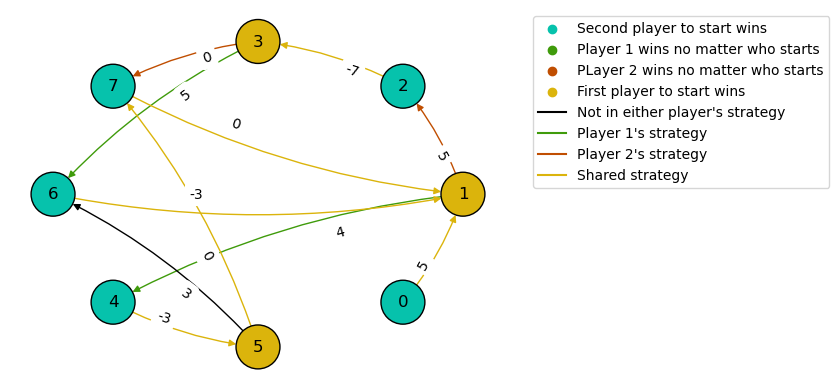

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
S=vgame.MPGPlot(M.graph,layout=nx.circular_layout)
S1,S2=mpg.optimal_strategy_pair(S.graph)
S.set_node_color_mapping(vgame.WinnerVisualiser(S.graph,S1,S2))
S.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
fig,ax=plt.subplots()
S.plot(ax=ax)

In [10]:
S1,S2=mpg.strategy_pair_tropical(M.graph)
M.set_node_color_mapping(vgame.WinnerVisualiser(M.graph,S1,S2))
M.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
M

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [11]:
from mpg.games import mpg
import networkx as nx
import numpy as np
import mpg.visualisation.game as vgame
#n=10,p=0.2,seed=50
#n=10,p=0.1,seed=66
seed=123
#seed=963 n=12,p=0.3
n=11
p=0.25
#n=6,seed=231,p=0.3 Counter Example!!!
#n=10,p=0.3,seed=0
#n=12,p=0.25,seed=53556
#n=11,p=0.25,seed=123
np.random.seed(seed)
A=nx.gnp_random_graph(n,p,directed=True,seed=seed)
for e in A.edges:
    A.edges[e]["weight"] =np.random.randint(-10,10)
    A.edges[e]["label"]= A.edges[e]["weight"]
A=mpg.mpg_from_digraph(A)
A.closure()
A=vgame.MPGVisualisation(A)
S1,S2=mpg.optimal_strategy_pair(A.graph,method="ACO")
A.set_node_color_mapping(vgame.WinnerVisualiser(A.graph,S1,S2))
A.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
A

MPGVisualisation(layout=Layout(height='500px', width='100%'))

<Axes: >

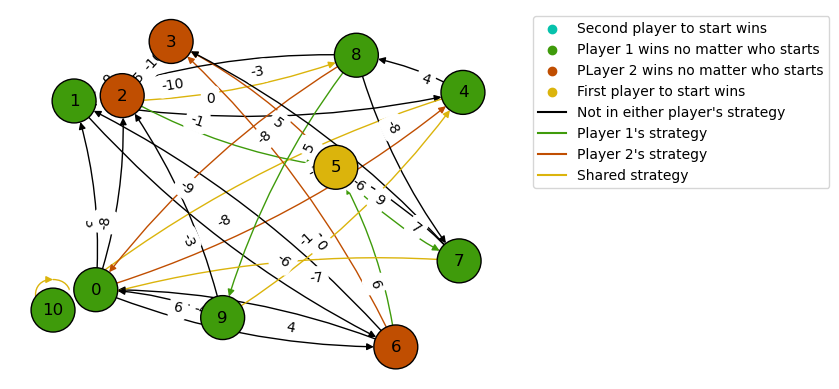

In [12]:
import matplotlib.pyplot as plt
S=vgame.MPGPlot(A.graph,layout=None)
S.set_node_color_mapping(vgame.WinnerVisualiser(S.graph,S1,S2))
S.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
fig,ax=plt.subplots()
S.plot(ax=ax)

In [20]:
edge=S.edges[2]
u=edge["start"]
v=edge["end"]
colour=vgame.Colour("#FF5555")
s=4
match (S.edge_color_mapping.strategy1 is not None and v == S.edge_color_mapping.strategy1[u],
               S.edge_color_mapping.strategy2 is not None and v == S.edge_color_mapping.strategy2[u]):
    case (True, True):
        colour = vgame.SHARED_COLOUR
        print(4)
        pass
    case (False, True):
        colour = vgame.PLAYER_2_COLOUR
        print(6)
        pass
    case (True, False):
        colour = vgame.PLAYER_1_COLOUR
        print(7)
        pass
    case (False,False):
        colour = vgame.EDGE_COLOUR
    
colour

Colour(burnt orange, hex=#c04e01)
6


In [54]:
ax.

<Axes: >

In [13]:
mpg.optimal_strategy_pair(A.graph)

({1: 3, 3: 0, 0: 0, 2: 1, 4: 1, 5: 3}, {3: 0, 1: 3, 0: 0, 2: 1, 4: 5, 5: 3})

In [14]:
A.graph.as_min_max_system()

System of 12 min-max constraints:
	V_0(1) <= max(V_1(3)+6)
	V_1(3) <= min(V_0(0)+-8,V_0(2)+0,V_0(4)+7)
	V_1(1) <= min(V_0(3)+6)
	V_0(3) <= max(V_1(0)+-8,V_1(2)+0,V_1(4)+7)
	V_1(0) <= min(V_0(0)+0)
	V_0(0) <= max(V_1(0)+0)
	V_1(2) <= min(V_0(0)+-1,V_0(1)+1,V_0(3)+-4)
	V_0(2) <= max(V_1(0)+-1,V_1(1)+1,V_1(3)+-4)
	V_1(4) <= min(V_0(1)+8,V_0(2)+-8,V_0(3)+-8,V_0(5)+-9)
	V_0(4) <= max(V_1(1)+8,V_1(2)+-8,V_1(3)+-8,V_1(5)+-9)
	V_1(5) <= min(V_0(3)+-7,V_0(4)+7)
	V_0(5) <= max(V_1(3)+-7,V_1(4)+7)

In [15]:
A.graph.as_min_max_system().solve()

{V_1(0): 148,
 V_0(4): 148,
 V_1(2): 133,
 V_0(0): 148,
 V_1(3): 140,
 V_1(1): 146,
 V_0(2): 147,
 V_1(5): 133,
 V_0(3): 140,
 V_0(5): 133,
 V_0(1): 132,
 V_1(4): 124}

In [33]:
S1_counter=mpg.counter_strategy(A.graph,S1,source=1)
A.set_node_color_mapping(vgame.WinnerVisualiser(A.graph,S1,S1_counter))
A.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S1_counter))
A

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [2]:
P1,P2=mpg.strategy_pair_tropical(A.graph,iters=1000)

In [3]:
A.set_node_color_mapping(vgame.WinnerVisualiser(A.graph,P1,P2))
A.set_edge_color_mapping(vgame.StrategyVisualiser(P1,P2))
A

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [17]:
P1_counter=mpg.counter_strategy(A.graph,P1,method="bellman-ford",source=2)
A.set_node_color_mapping(vgame.WinnerVisualiser(A.graph,P1,P1_counter))
A.set_edge_color_mapping(vgame.StrategyVisualiser(P1,P1_counter))
A

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [7]:
P2_counter=mpg.counter_strategy(A.graph,P2,method="bellman-ford",player=mpg.MeanPayoffGraph.player0)
A.set_node_color_mapping(vgame.WinnerVisualiser(A.graph,P2_counter,P2))
A.set_edge_color_mapping(vgame.StrategyVisualiser(P2_counter,P2))
A

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [114]:
P2_counter

In [57]:
mpg.mean_payoffs(A.graph,P1,P2)

{(0, 0): -5.75,
 (7, 1): -5.75,
 (0, 1): -5.75,
 (7, 0): -5.75,
 (3, 1): -7.666666666666667,
 (3, 0): -5.75,
 (4, 1): 0.0,
 (4, 0): 0.0,
 (8, 1): -5.75,
 (8, 0): -5.75,
 (1, 0): -5.75,
 (1, 1): -5.75,
 (2, 1): 0.0,
 (2, 0): 0.0,
 (6, 1): -5.75,
 (6, 0): -7.666666666666667,
 (5, 1): -5.75,
 (5, 0): -7.666666666666667,
 (9, 1): -7.666666666666667,
 (9, 0): -5.75}

In [43]:
O1,O2=mpg.optimal_strategy_pair(A.graph)
mpg.mean_payoffs(A.graph,P1,O2)

{(0, 0): -1.0,
 (2, 1): -1.0,
 (0, 1): -1.3333333333333333,
 (2, 0): -1.3333333333333333,
 (1, 1): -1.0,
 (1, 0): -1.0,
 (3, 1): -1.3333333333333333,
 (3, 0): -1.0,
 (6, 1): 0.0,
 (6, 0): -1.0,
 (9, 1): -1.0,
 (9, 0): -1.3333333333333333,
 (5, 1): 0.0,
 (5, 0): 0.0,
 (4, 1): -1.0,
 (4, 0): -1.0,
 (7, 0): -1.0,
 (7, 1): -1.0,
 (8, 0): 0.0,
 (8, 1): -1.0}

$$
A[5]+B[3]=3
$$